***GRADUATE ADMISSION PREDICTION***

*Using classification technique for
prediction of Graduate Admissions
from an Indian perspective.*  
*Dataset:Admission_Predict.csv*

**Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Loading the dataset**

In [2]:
data = pd.read_csv('/content/Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
data.shape

(400, 9)

In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

**Data Analysis**

In [9]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [11]:
skewness = data.drop("Serial No.", axis=1).skew()

In [12]:
print("Skewness of Numerical Columns:")
print(skewness)

Skewness of Numerical Columns:
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64


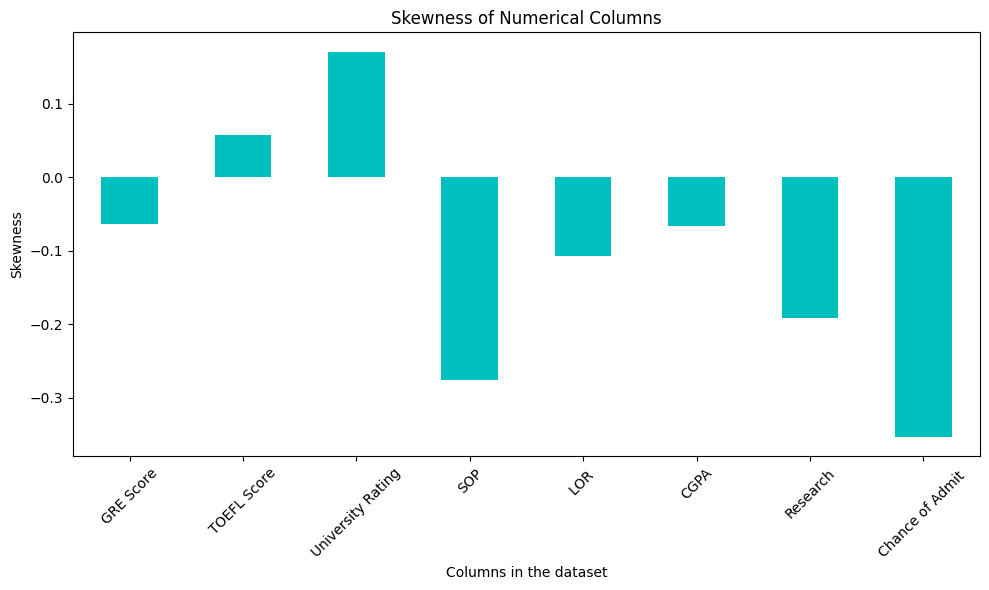

In [13]:
plt.figure(figsize=(10, 6))
skewness.plot(kind="bar", color="c")
plt.title("Skewness of Numerical Columns")
plt.xlabel("Columns in the dataset")
plt.ylabel("Skewness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

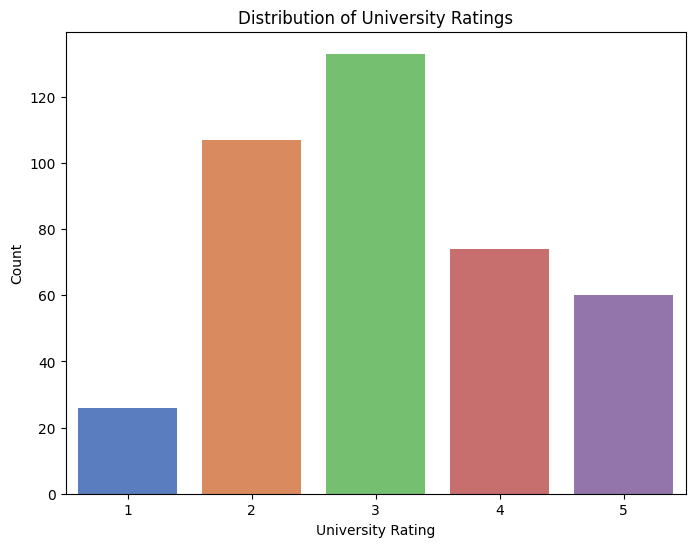

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x="University Rating", data=data, palette="muted")
plt.title("Distribution of University Ratings")
plt.xlabel("University Rating")
plt.ylabel("Count")
plt.show()

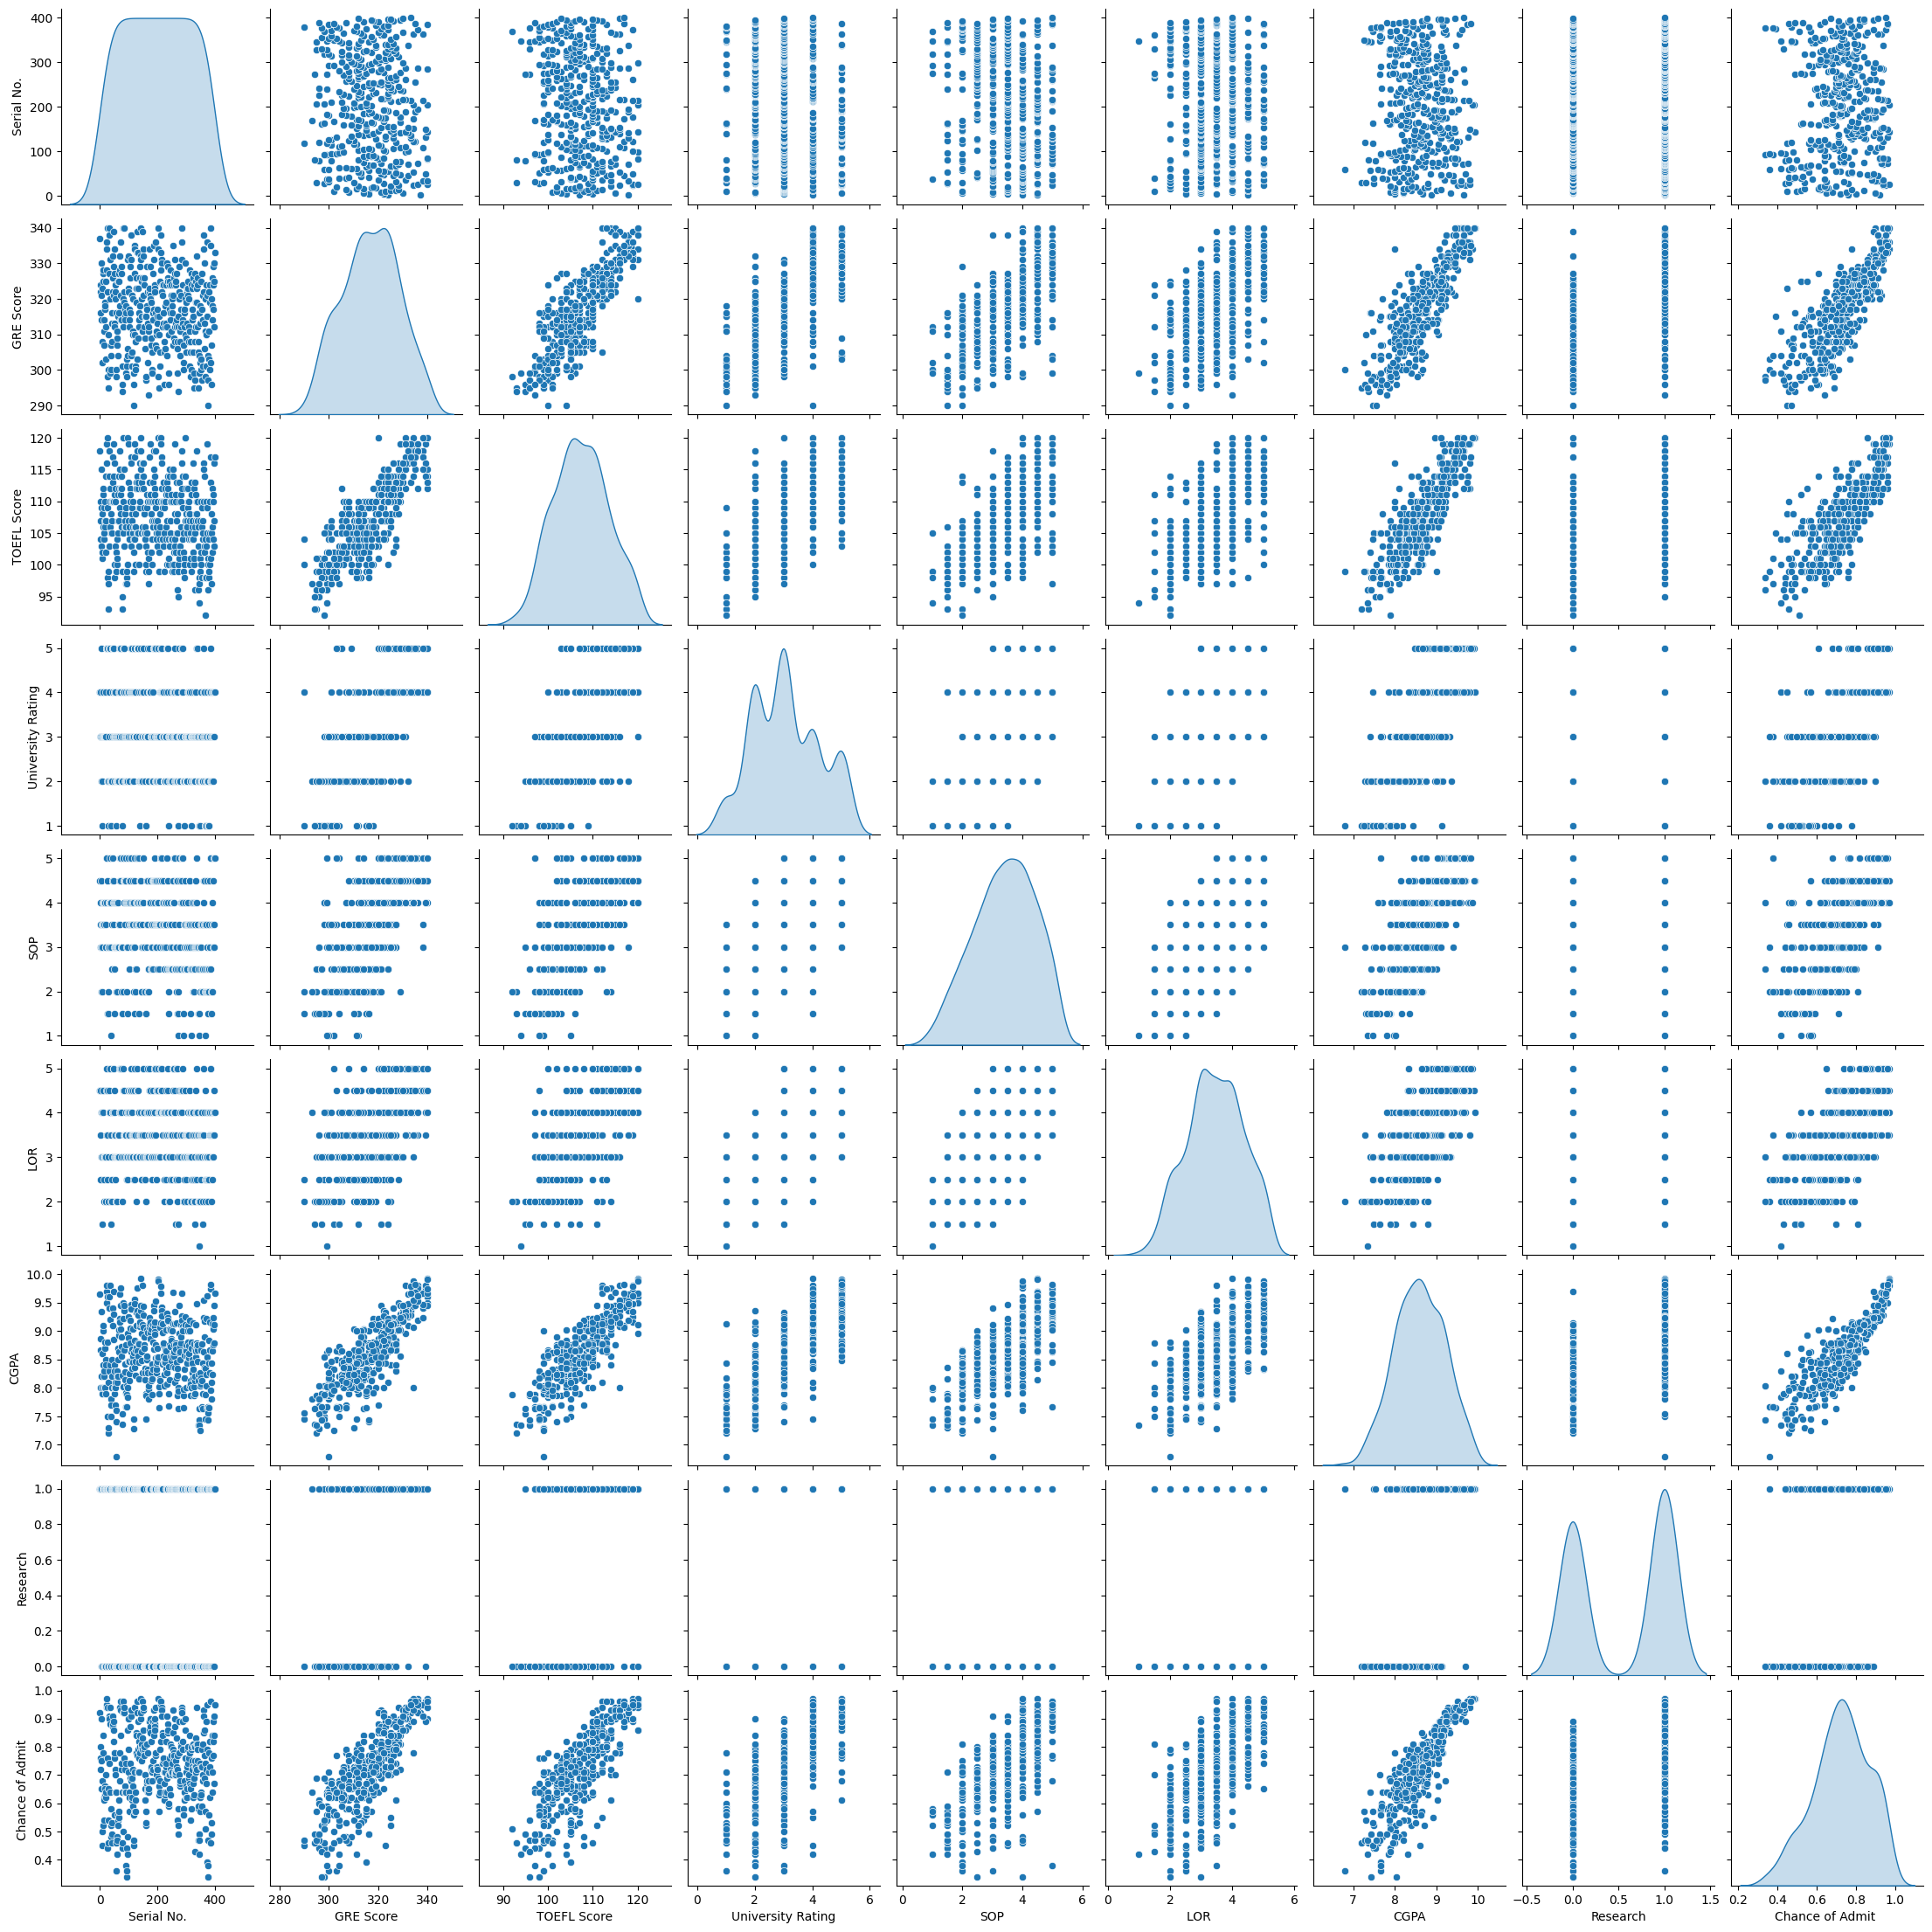

In [15]:
sns.pairplot(data, diag_kind="kde")
plt.show()

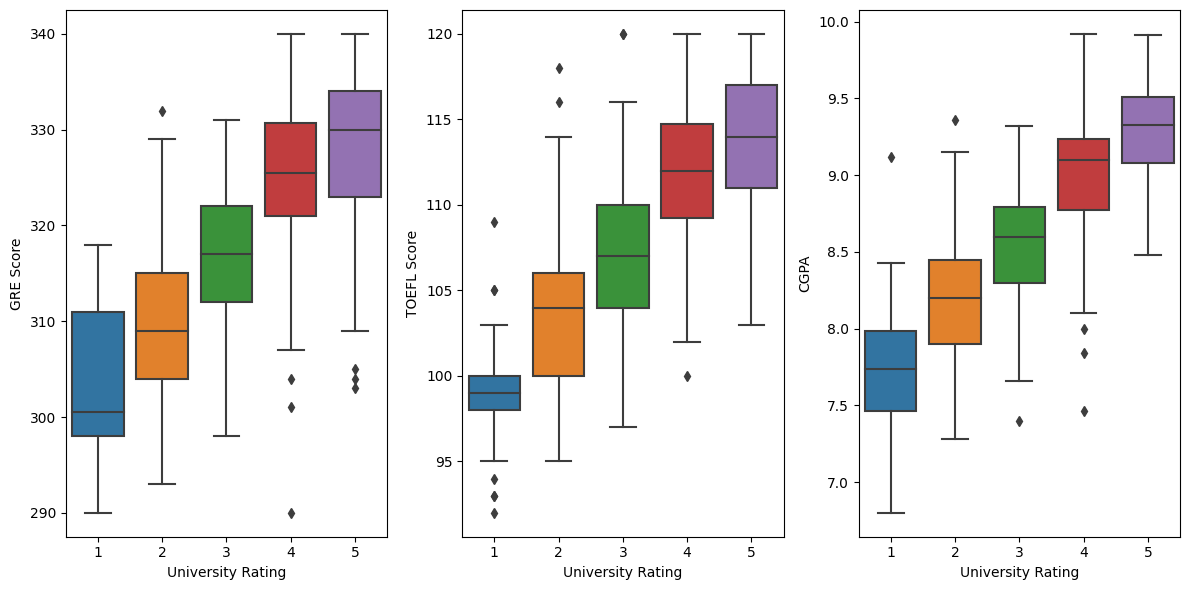

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x="University Rating", y="GRE Score", data=data)
plt.subplot(1, 3, 2)
sns.boxplot(x="University Rating", y="TOEFL Score", data=data)
plt.subplot(1, 3, 3)
sns.boxplot(x="University Rating", y="CGPA", data=data)
plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import zscore
z_scores = zscore(data.drop(columns=["Serial No."]))
threshold = 5
outlier_indices = (z_scores > threshold).any(axis=1)
print("Number of outliers:", outlier_indices.sum())

Number of outliers: 0


**Correlation**

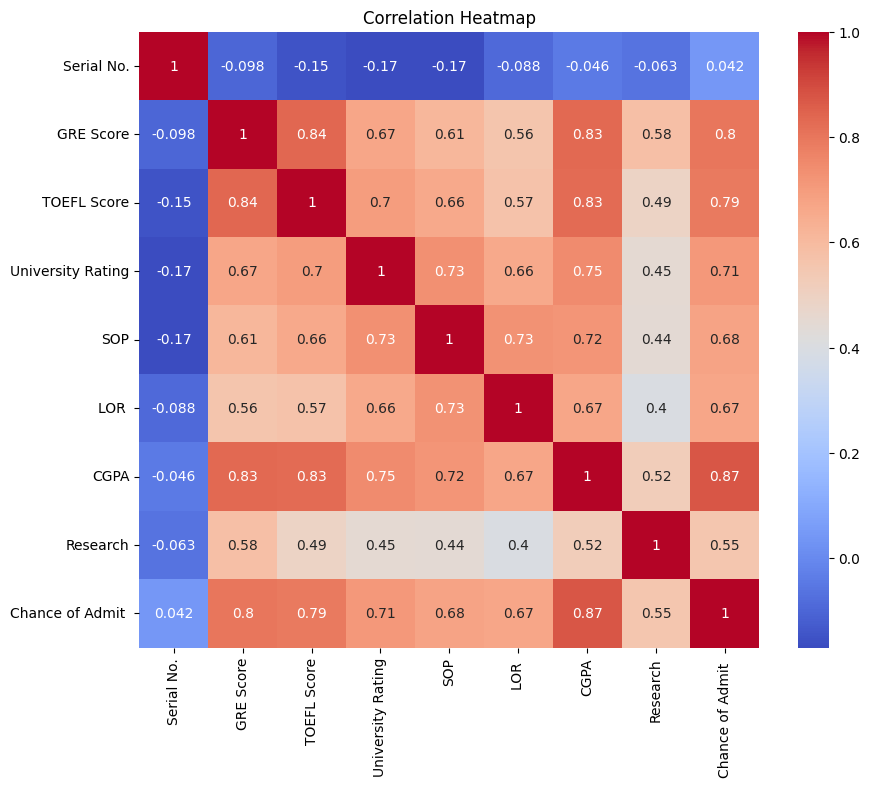

In [19]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [21]:
data["Admitted"] = data["Chance of Admit "].apply(lambda x: 1 if x >= 0.5 else 0)

In [22]:
X = data.drop(["Chance of Admit ", "Admitted"], axis=1)  # Dropping the target and the derived column
y = data["Admitted"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
y_pred = classifier.predict(X_test_scaled)

**Model Evaluation**

In [27]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [28]:
print("Accuracy:", accuracy)

Accuracy: 0.95


In [47]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      0.97      0.97        78

    accuracy                           0.95        80
   macro avg       0.49      0.49      0.49        80
weighted avg       0.95      0.95      0.95        80



**Prediction**

In [29]:
new_input = pd.DataFrame({
    "Serial No.":[2],
    "GRE Score": [320],
    "TOEFL Score": [110],
    "University Rating": [4],
    "SOP": [4.5],
    "LOR ": [4.5],
    "CGPA": [9.0],
    "Research": [1]
})

In [33]:
new_input_scaled = scaler.transform(new_input)
predicted_admission_prob = classifier.predict_proba(new_input_scaled)[:, 1]
threshold = 0.7
predicted_admission_chance = 1 if predicted_admission_prob >= threshold else 0
print("Predicted Chance of Admission: ", predicted_admission_chance)

Predicted Chance of Admission:  1
